In [2]:
! pip install --upgrade --user numpy scipy matplotlib ipython jupyter pandas sympy
! pip install --user --upgrade pixiedust
! pip install --user --upgrade PyWavelets
! pip install --user --upgrade statsmodels

Requirement already up-to-date: numpy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: scipy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: matplotlib in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: ipython in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: jupyter in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: pandas in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: sympy in /gpfs/global_fs01/s

In [3]:
from io import StringIO
from scipy import signal
from mpl_toolkits.mplot3d.axes3d import Axes3D
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pixiedust
from statsmodels.tsa.stattools import adfuller

Pixiedust database opened successfully


/gpfs/fs01/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# The code was removed by DSX for sharing.

,Time (SEC),Old LISTENER (Spike),New LISTENER (NO SPIKE)
0,1,1.48932,2.60037
1,2,1.35296,2.91090
2,3,1.54742,2.71367
3,4,1.39630,2.99318
4,5,1.22950,1.95345



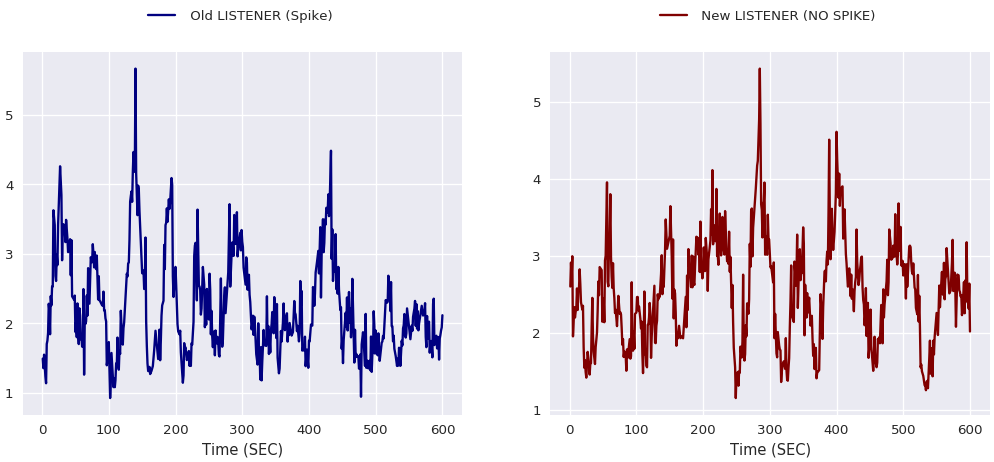

In [5]:
display(df_data_1)

In [9]:
respPre=np.squeeze(np.asarray(np.delete(df_data_1.values,[0,2],axis=1)))
respPost =np.squeeze(np.asarray(np.delete(df_data_1.values,[0,1],axis=1)))
timeseq =np.squeeze(np.asarray(np.delete(df_data_1.values,[1,2],axis=1)))
print(respPre.size)
print(np.std(np.asarray(np.delete(df_data_1.values,[0,2],axis=1), dtype=np.float32)))
print(np.std(np.asarray(np.delete(df_data_1.values,[0,1],axis=1), dtype=np.float32)))
print(np.average(np.asarray(np.delete(df_data_1.values,[0,2],axis=1), dtype=np.float32)))
print(np.average(np.asarray(np.delete(df_data_1.values,[0,1],axis=1), dtype=np.float32)))

600
0.72284
0.689633
2.22844
2.53487


In [10]:
f, Pxx_spec = signal.welch(respPre, window ='boxcar',fs=1.0,nperseg =256,  scaling='spectrum') 
f1, Pxx_spec1 = signal.welch(respPost, window ='boxcar',fs=1.0, nperseg =256,  scaling='spectrum')


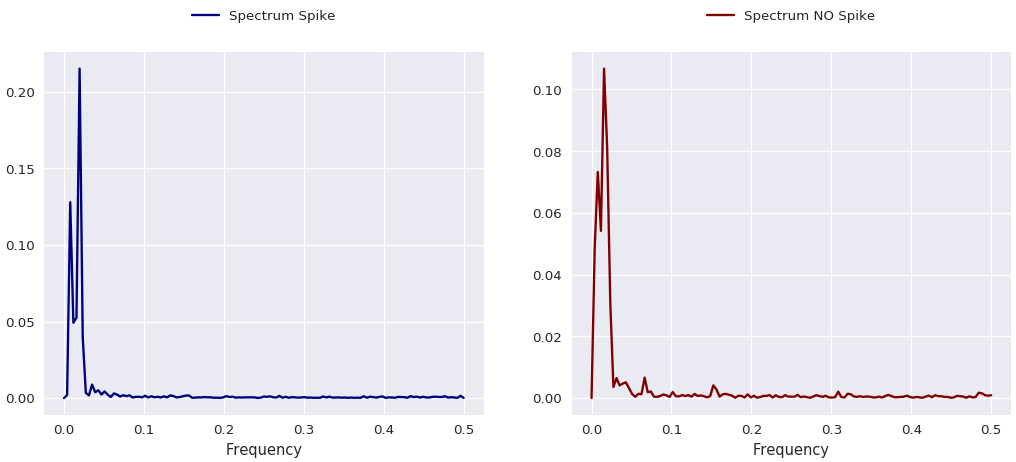

In [11]:
pd_spectre=pd.DataFrame(data={'Spectrum Spike':np.squeeze(np.absolute(Pxx_spec)), 'Spectrum NO Spike':np.squeeze(np.absolute(Pxx_spec1)),'Frequency':f},dtype=float)
display(pd_spectre)

In [12]:
# Signal stationariety test
# more ADF probability is negative more the signal is stationary
# we also insert 5%, 1% and 10% prob lavele as reference

In [13]:
result = adfuller(respPre)
print('response with SPIKE ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

response with SPIKE ADF Statistic: -5.583926
p-value: 0.000001
Critical Values:
	5%: -2.866
	1%: -3.442
	10%: -2.569


In [14]:
result = adfuller(respPost)
print('response with NO SPIKE ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

response with NO SPIKE ADF Statistic: -5.664112
p-value: 0.000001
Critical Values:
	5%: -2.866
	1%: -3.442
	10%: -2.569


In [15]:
#analisi di autocorrelazione


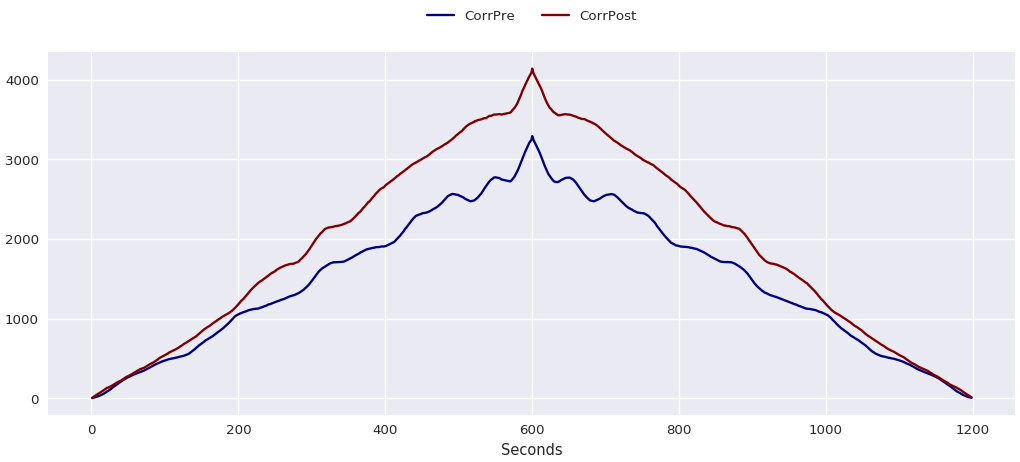

In [16]:
CorrPre = np.correlate(respPre, respPre, mode='full')
CorrPost = np.correlate(respPost, respPost, mode='full')
pd_correlation=pd.DataFrame(data={'CorrPre':np.squeeze(np.absolute(CorrPre)), 
                              'CorrPost':np.squeeze(np.absolute(CorrPost)),
                              'Seconds':np.arange(1,CorrPost.size+1,1)},dtype=float)

display(pd_correlation)

In [17]:
#analisi a wavelet GAUSS 7

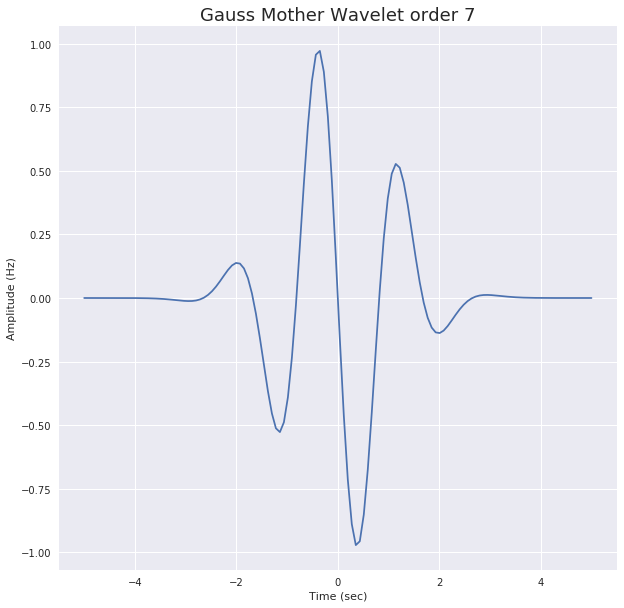

In [18]:
wavelet = pywt.ContinuousWavelet('gaus7')
plt.figure(figsize = (10,10))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Hz)')
plt.title('Gauss Mother Wavelet order 7', fontsize=18)
psi, x = wavelet.wavefun(level=7)
plt.plot(x,psi)
plt.show()

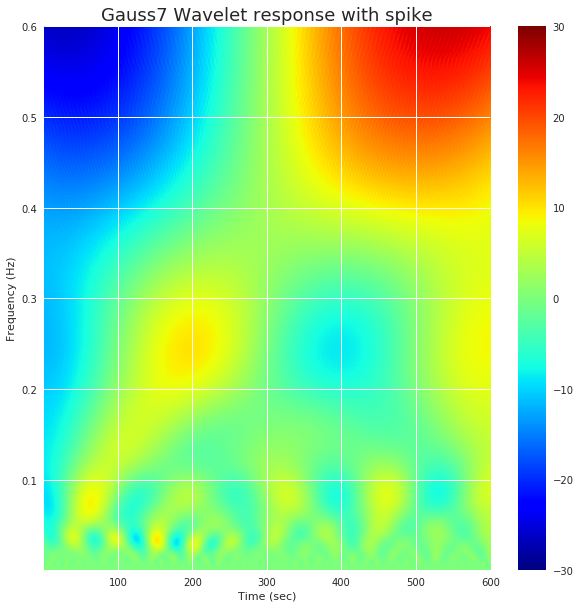

In [19]:
wPre, freqs = pywt.cwt(respPre, timeseq, 'gaus7')
plt.figure(figsize = (10,10))
im = plt.imshow(wPre, extent=[timeseq.min(), timeseq.max(), freqs.min(), freqs.max()], cmap='jet', vmin=-30, vmax=30, aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss7 Wavelet response with spike', fontsize=18)
plt.show() 

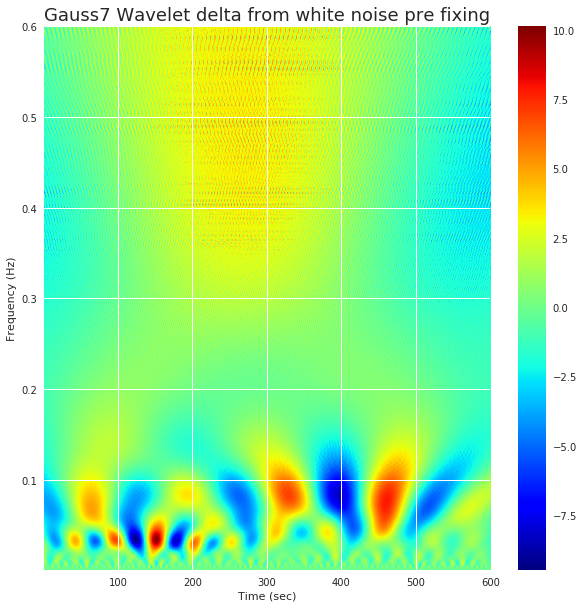

In [23]:
#remove withe noise from response pre and resulting deltaw pre wavelet:
mean = np.average(np.asarray(np.delete(df_data_1.values,[0,2],axis=1), dtype=np.float32))
std = np.std(np.asarray(np.delete(df_data_1.values,[0,2],axis=1), dtype=np.float32))
num_samples = 600 
samplespre = np.random.normal(mean, std, size=num_samples)
whitePre, freqs = pywt.cwt(samplespre, timeseq, 'gaus7')
deltaPre=wPre-whitePre
plt.figure(figsize = (10,10))
im = plt.imshow(deltaPre, extent=[timeseq.min(), timeseq.max(), freqs.min(), freqs.max()],cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss7 Wavelet delta from white noise pre fixing', fontsize=18)
plt.show() 

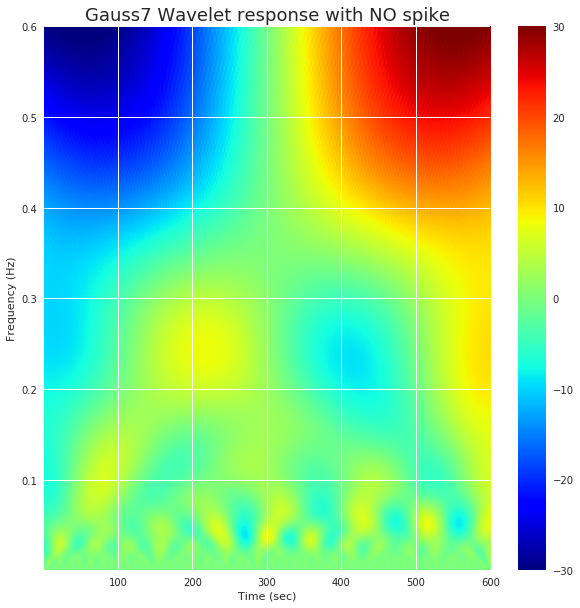

In [20]:
wPost, freqs = pywt.cwt(respPost, timeseq, 'gaus7')
plt.figure(figsize = (10,10))
im = plt.imshow(wPost, extent=[timeseq.min(), timeseq.max(), freqs.min(), freqs.max()], vmin=-30, vmax=30,cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss7 Wavelet response with NO spike', fontsize=18)
plt.show() 

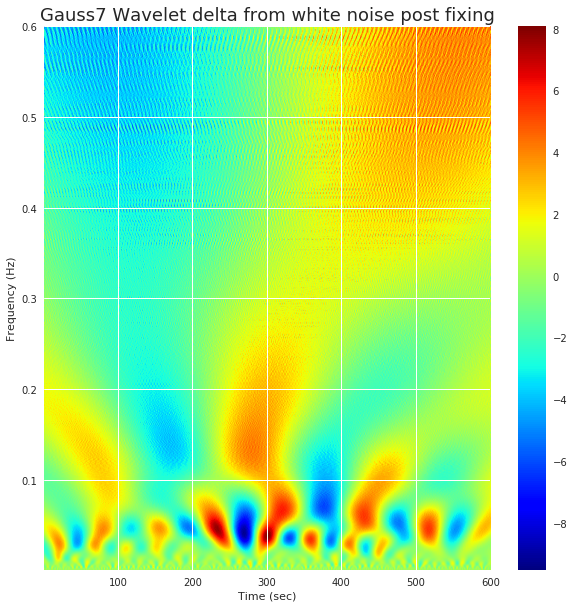

In [24]:
#remove withe noise from response pre and resulting deltaw pre wavelet:
mean = np.average(np.asarray(np.delete(df_data_1.values,[0,1],axis=1), dtype=np.float32))
std = np.std(np.asarray(np.delete(df_data_1.values,[0,1],axis=1), dtype=np.float32))
num_samples = 600 
samplespost = np.random.normal(mean, std, size=num_samples)
whitePost, freqs = pywt.cwt(samplespre, timeseq, 'gaus7')
deltaPost=wPost-whitePost
plt.figure(figsize = (10,10))
im = plt.imshow(deltaPost, extent=[timeseq.min(), timeseq.max(), freqs.min(), freqs.max()],cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss7 Wavelet delta from white noise post fixing', fontsize=18)
plt.show() 

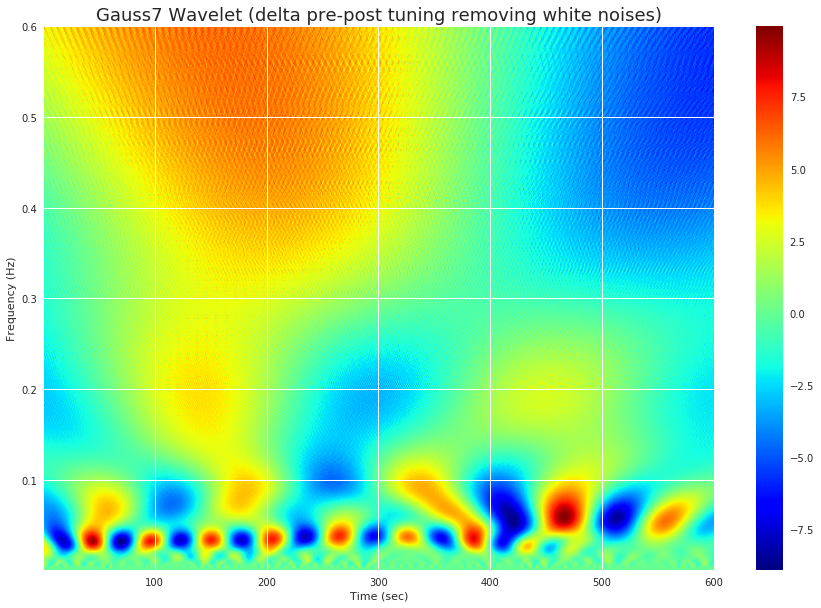

In [28]:
deltaW1=deltaPre-deltaPost
plt.figure(figsize = (15,10))
im1=plt.imshow(deltaW1, extent=[timeseq.min(), timeseq.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto',interpolation ='bilinear', origin='lower')
plt.colorbar(im1)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss7 Wavelet (delta pre-post tuning removing white noises)', fontsize=18)
plt.show() 

In [ ]:
#analisi a wavelet Mexican Hat

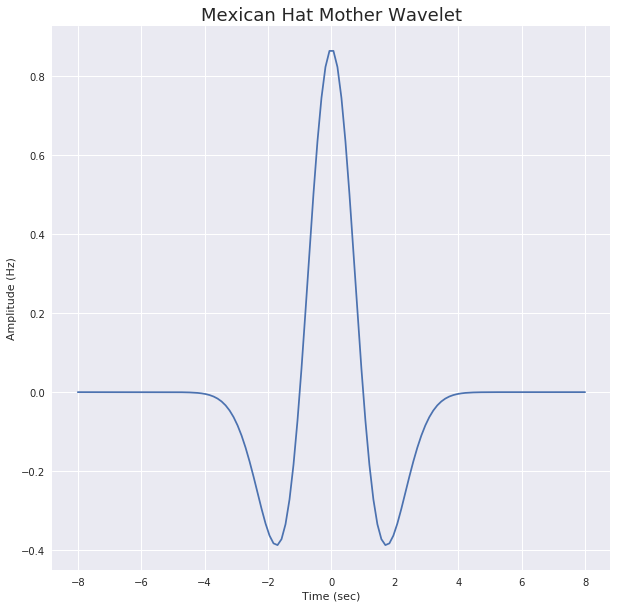

In [56]:
wavelet = pywt.ContinuousWavelet('mexh')
plt.figure(figsize = (10,10))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Hz)')
plt.title('Mexican Hat Mother Wavelet', fontsize=18)
psi, x = wavelet.wavefun(level=7)
plt.plot(x,psi)
plt.show()

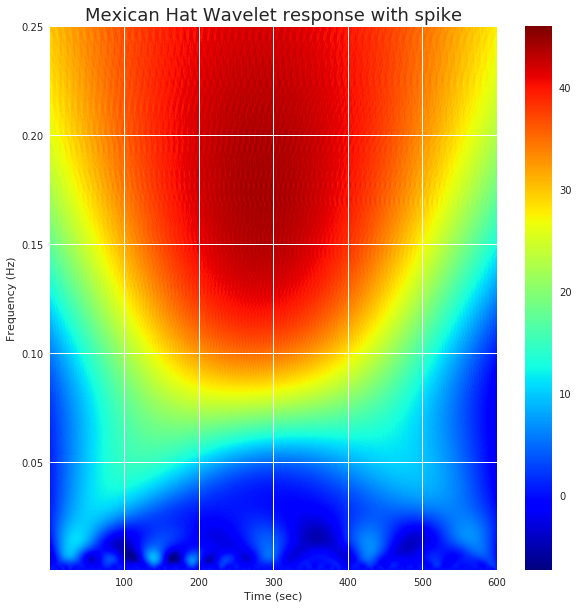

In [67]:
wPre, freqs = pywt.cwt(respPre, timeseq, 'mexh')
plt.figure(figsize = (10,10))
im = plt.imshow(wPre, extent=[timeseq.min(), timeseq.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto',interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Mexican Hat Wavelet response with spike', fontsize=18)
plt.show() 

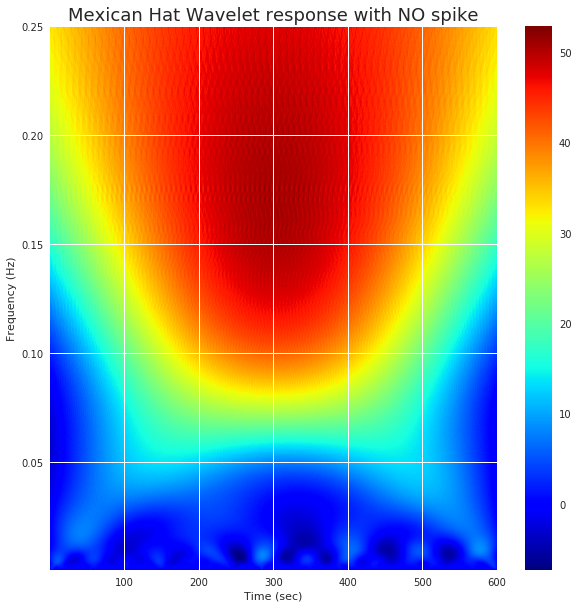

In [68]:
wPost, freqs = pywt.cwt(respPost, timeseq, 'mexh')
plt.figure(figsize = (10,10))
im = plt.imshow(wPost, extent=[timeseq.min(), timeseq.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Mexican Hat Wavelet response with NO spike', fontsize=18)
plt.show() 

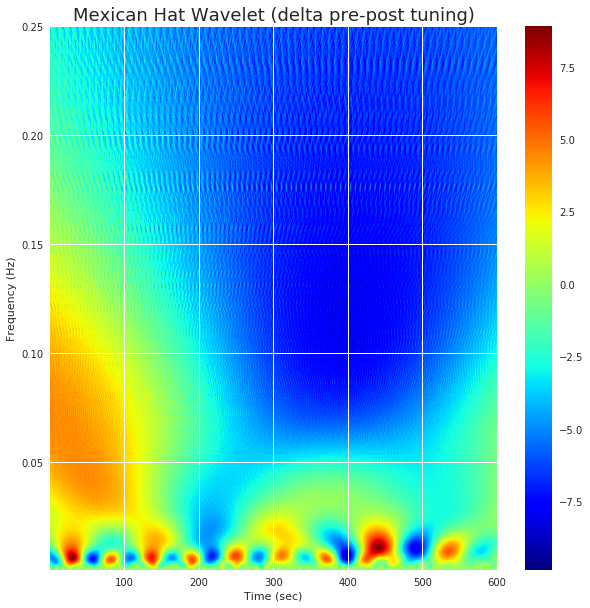

In [69]:
deltaW2=wPre-wPost
plt.figure(figsize = (10,10))
im1=plt.imshow(deltaW2, extent=[timeseq.min(), timeseq.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto',interpolation ='bilinear', origin='lower')
plt.colorbar(im1)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Mexican Hat Wavelet (delta pre-post tuning)', fontsize=18)
plt.show() 

In [ ]:
# Avarage between deltas wavelets with Mexicxan Hat & Gauss 9

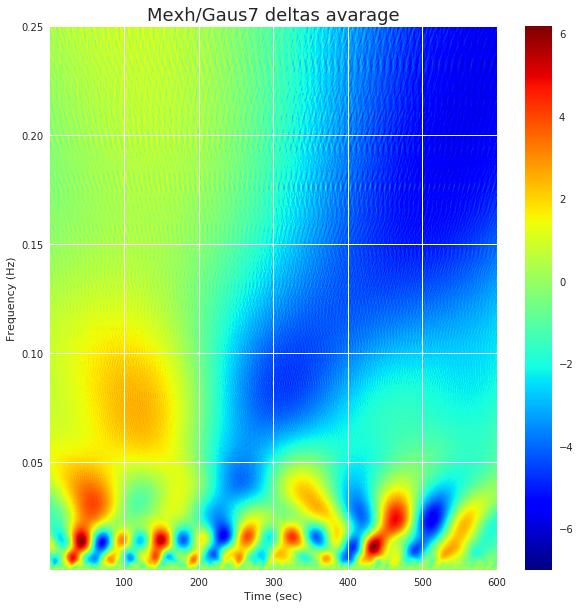

In [71]:
deltaWTot=(deltaW1+deltaW2)/2
plt.figure(figsize = (10,10))
im = plt.imshow(deltaWTot, extent=[timeseq.min(), timeseq.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Mexh/Gaus7 deltas avarage', fontsize=18)
plt.show() 

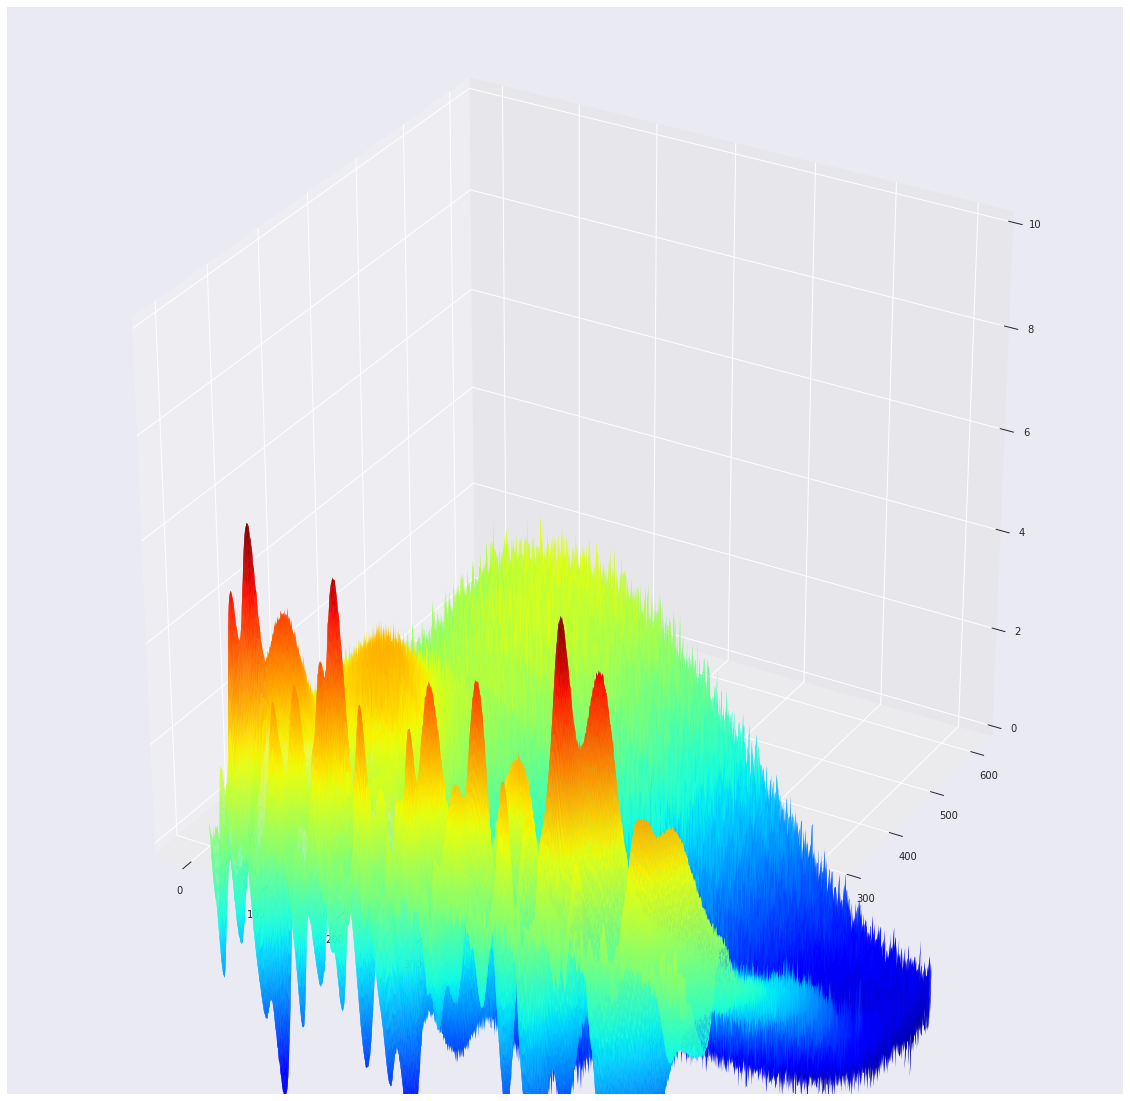

In [76]:
fig = plt.figure(facecolor='w',figsize = (20,20))
ax2 = fig.add_subplot(1,1,1,projection='3d')
x,y = np.mgrid[:deltaWTot.shape[0],:deltaWTot.shape[1]]
ax2.plot_surface(y,x,deltaWTot,cmap='jet',rstride=1,cstride=1,linewidth=0.,antialiased=True)
ax2.set_zlim3d(0,10)
plt.show()